In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [41]:
url = 'https://github.com/AnasRouam/Energy-Consumption-Prediction/blob/main/data.csv'
path = 'data.csv'
df = pd.read_csv(path)
print(df.head())

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial 

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [25]:
df['Density (P/Km2)'] = df['Density (P/Km2)'].str.replace(',', '')
df['Density (P/Km2)'] = df['Density (P/Km2)'].astype(float)

In [26]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density (P/Km2),Land Area (Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,223.573191,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,683.463448,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,34.000000,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,87.000000,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,219.000000,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


# EDA (Exploratory Data Analysis)
Let's check the correlation between GDP per Capita and availabitlity of electrity

In [27]:
correlation = df['Access to electricity (% of population)'].corr(df['gdp_per_capita'])
print(f"Correlation between Access to electricity and GDP per capita: {correlation}")

Correlation between Access to electricity and GDP per capita: 0.4184591070584752


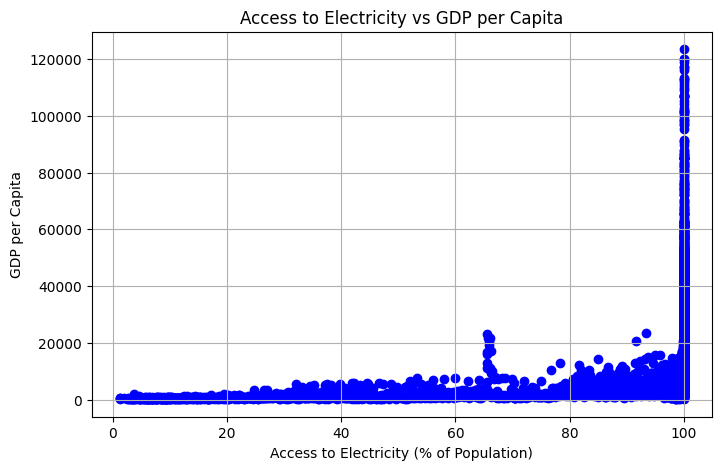

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Access to electricity (% of population)'], df['gdp_per_capita'], color='blue')
plt.title('Access to Electricity vs GDP per Capita')
plt.xlabel('Access to Electricity (% of Population)')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()

## Modelling the relationship with a regression model

In [42]:
df_cleaned = df.dropna(subset=['Access to electricity (% of population)', 'gdp_per_capita'])

In [43]:
Y = df_cleaned['gdp_per_capita']
X = df_cleaned['Access to electricity (% of population)']
X = sm.add_constant(X)
print(X.shape)
print(Y.shape)

(3358, 2)
(3358,)


In [44]:
model = sm.OLS(Y, X).fit()

In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         gdp_per_capita   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     712.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          1.70e-142
Time:                        20:42:49   Log-Likelihood:                -37650.
No. Observations:                3358   AIC:                         7.530e+04
Df Residuals:                    3356   BIC:                         7.532e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

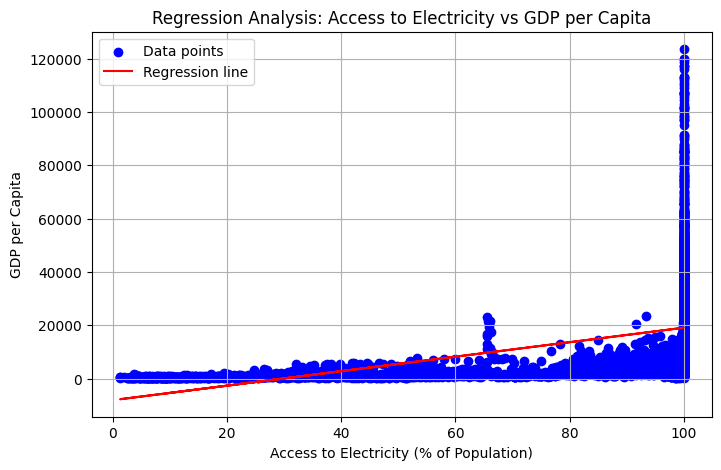

In [48]:
# Plotting the data points and regression line
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned['Access to electricity (% of population)'], df_cleaned['gdp_per_capita'], color='blue', label='Data points')
plt.plot(df_cleaned['Access to electricity (% of population)'], model.predict(X), color='red', label='Regression line')
plt.title('Regression Analysis: Access to Electricity vs GDP per Capita')
plt.xlabel('Access to Electricity (% of Population)')
plt.ylabel('GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()

<strong>I think there could be strong correlation for points before 95% access</strong>

In [49]:
filtered_df = df_cleaned[df_cleaned['Access to electricity (% of population)'] < 95]

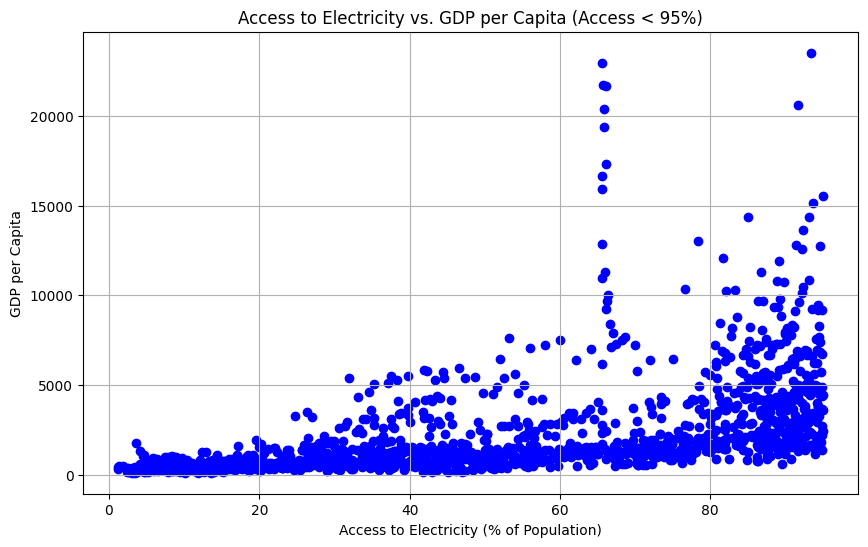

In [50]:
# Visualize the data using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Access to electricity (% of population)'], filtered_df['gdp_per_capita'], color='blue')
plt.title('Access to Electricity vs. GDP per Capita (Access < 95%)')
plt.xlabel('Access to Electricity (% of Population)')
plt.ylabel('GDP per Capita')
plt.grid()
plt.show()

In [51]:
# Calculate and print the correlation coefficient for the filtered data
correlation = filtered_df['Access to electricity (% of population)'].corr(filtered_df['gdp_per_capita'])
print(f"\nCorrelation Coefficient (Access < 95%): {correlation}")


Correlation Coefficient (Access < 95%): 0.5253606461554513


In [52]:
# Fit a regression model on the filtered data
Y_filtered = filtered_df['gdp_per_capita']
X_filtered = filtered_df['Access to electricity (% of population)']
X_filtered = sm.add_constant(X_filtered)  # Add constant for the intercept

In [53]:
# Fit the regression model
model_filtered = sm.OLS(Y_filtered, X_filtered).fit()

In [54]:
# Print the regression results
print("\nRegression Results for Access < 95%:")
print(model_filtered.summary())


Regression Results for Access < 95%:
                            OLS Regression Results                            
Dep. Variable:         gdp_per_capita   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     555.1
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          3.07e-104
Time:                        20:47:40   Log-Likelihood:                -13397.
No. Observations:                1458   AIC:                         2.680e+04
Df Residuals:                    1456   BIC:                         2.681e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------